Part 1: Data Understanding , Preparation and Imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

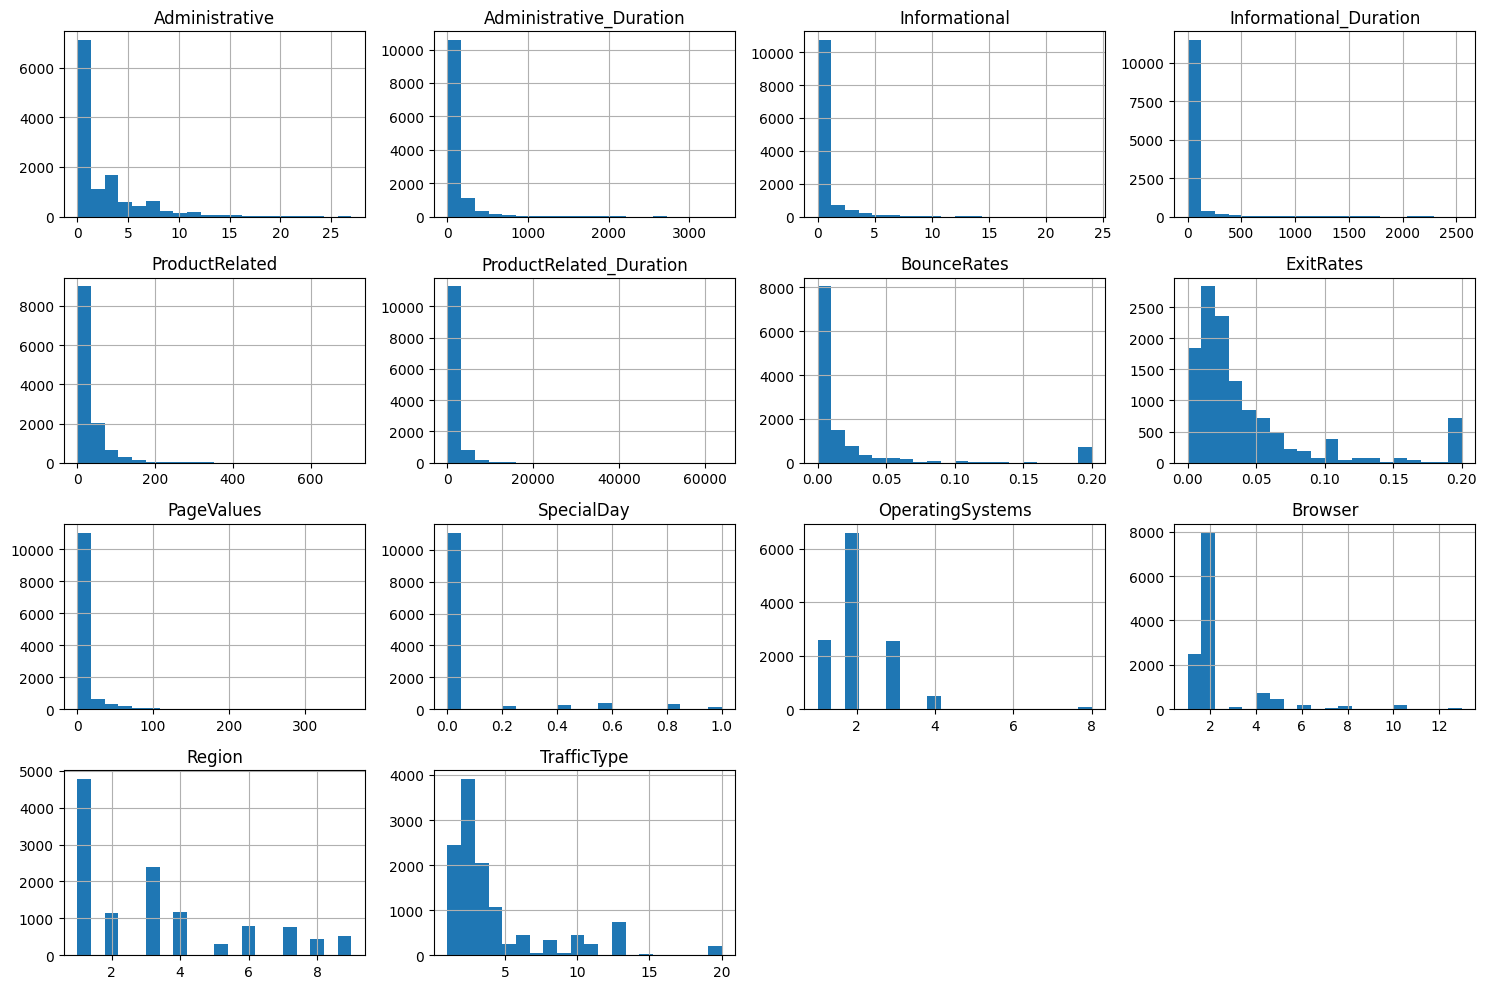

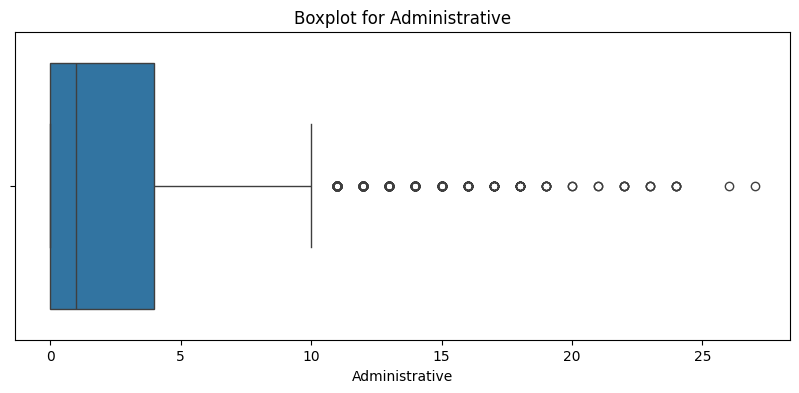

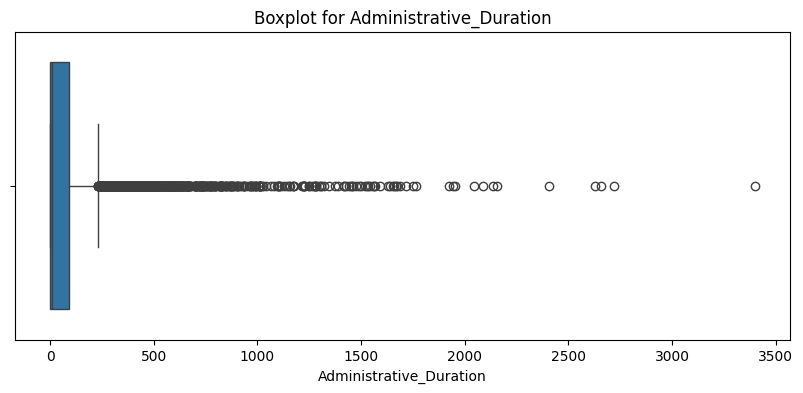

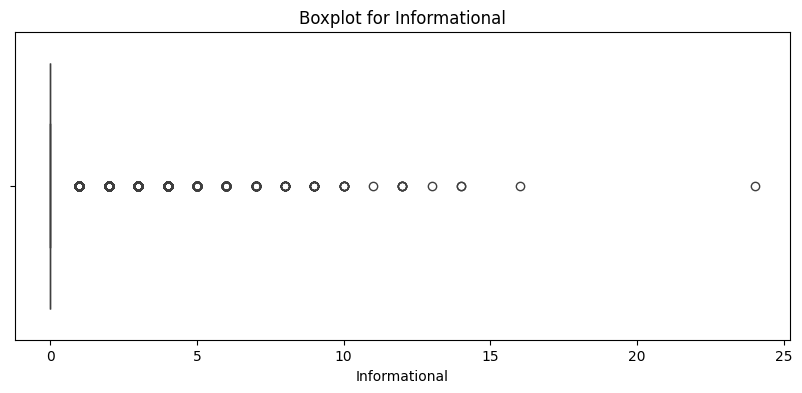

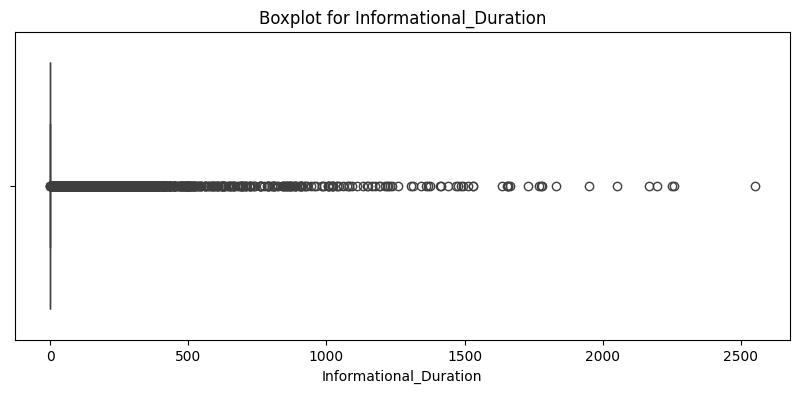

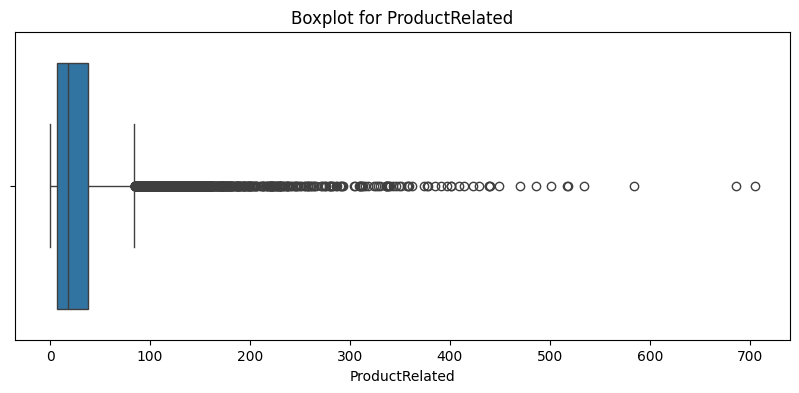

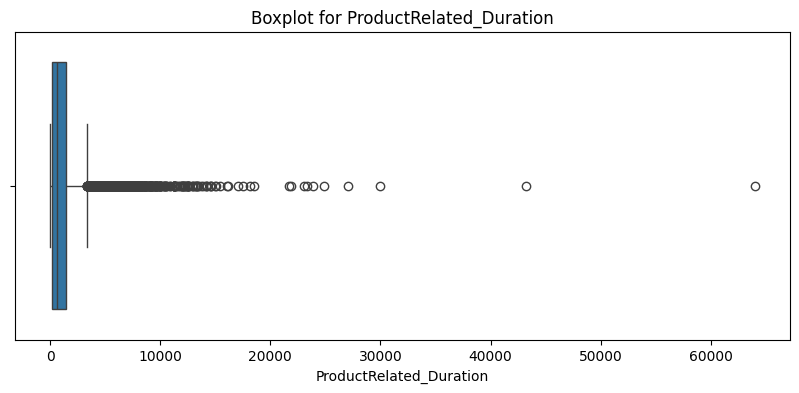

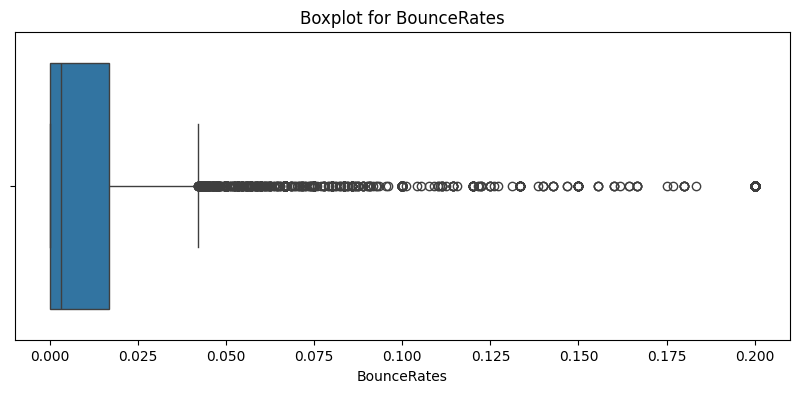

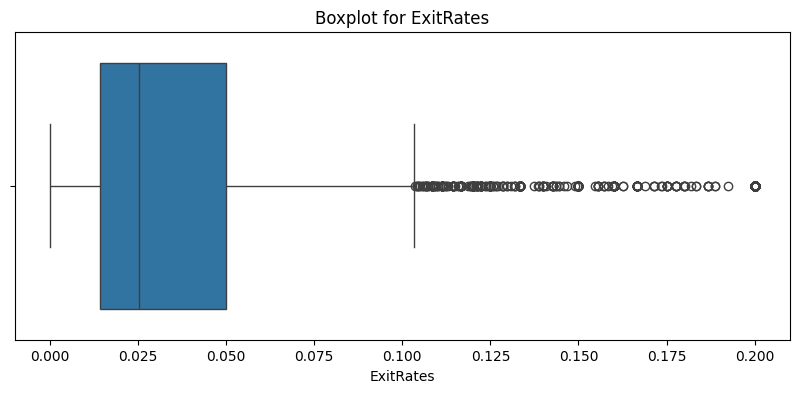

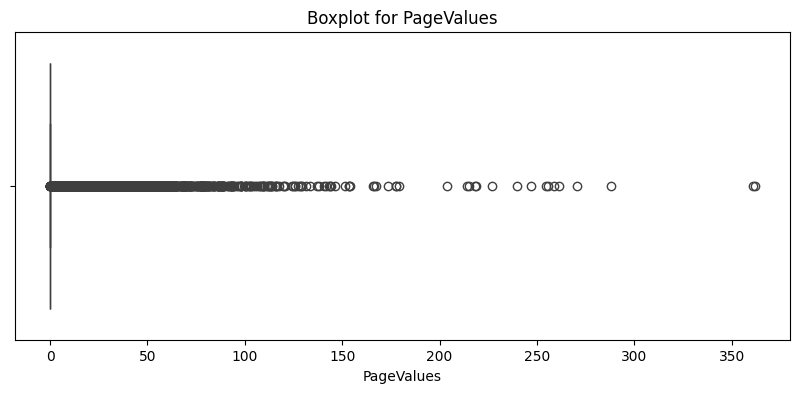

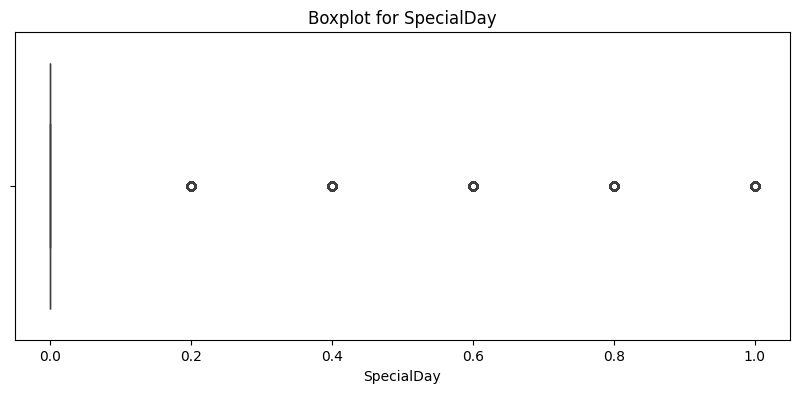

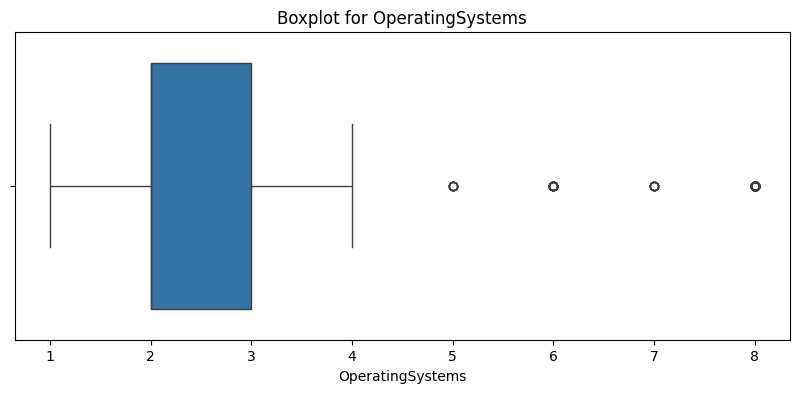

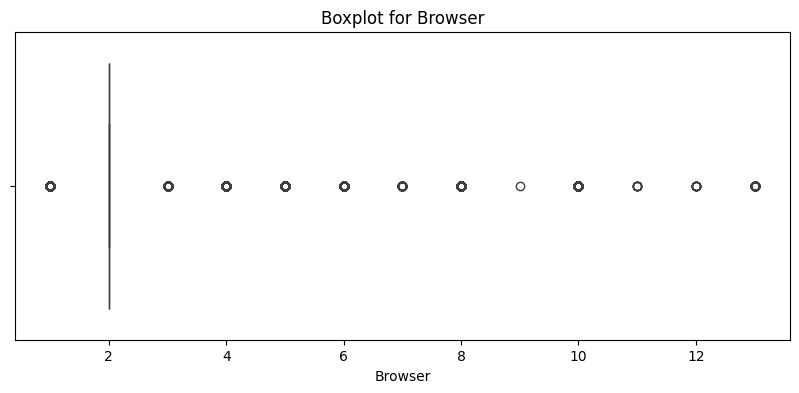

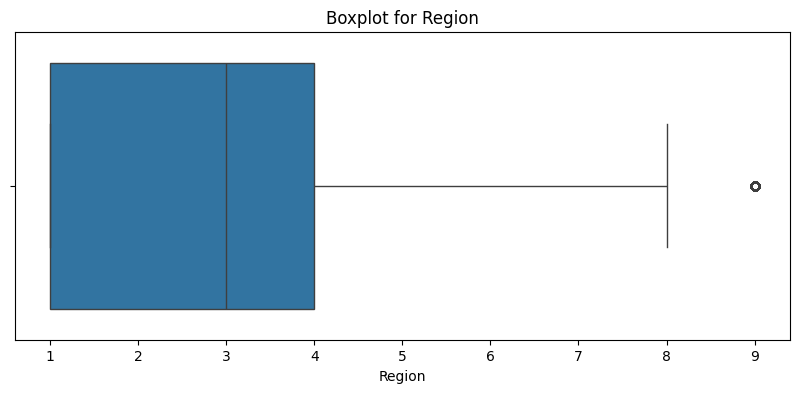

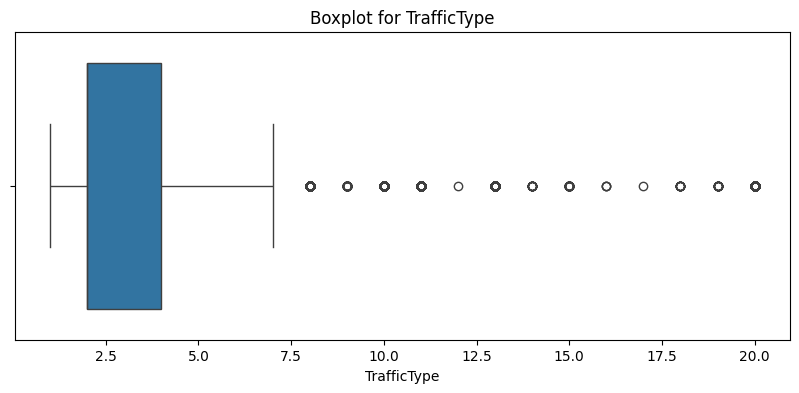

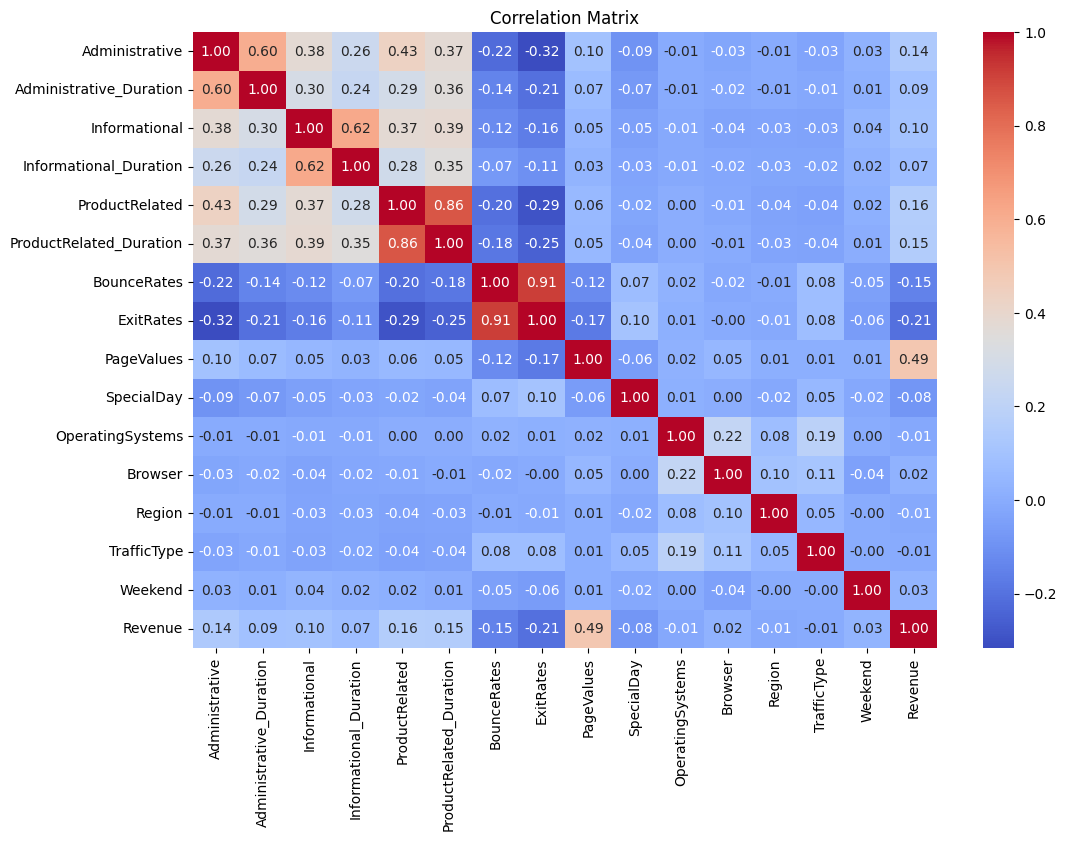

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_D

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)


df.info()

# Check for missing values
print(df.isnull().sum())

# Basic descriptive statistics
print(df.describe())

# Histograms for numerical variables
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots to detect outliers for numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Correlation matrix to identify relationships with 'Revenue'
correlation_matrix = df.corr(numeric_only=True) # Add numeric_only=True
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Identify variables most strongly correlated with Revenue
correlations_with_revenue = correlation_matrix['Revenue'].sort_values(ascending=False)
print(correlations_with_revenue)

# ---------------------- Data Preparation ----------------------

# Remove duplicate records
df = df.drop_duplicates()

# Handling missing values
# Check for missing data again
df.isnull().sum()

# ---------------------- Data Imputation ----------------------

# Impute missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':  # Categorical
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numerical
            df[col].fillna(df[col].median(), inplace=True)

# Data type transformations
# Example: Converting categorical data to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_enc.fit_transform(df[col])

# Verify changes
df.info()

# Define the file path with the filename
cleaned_file_path = '/content/online_shoppers_intention_cleaned.csv'

# Save the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")



**Part 2 : Data Modeling **


Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2059
           1       0.78      0.39      0.52       382

    accuracy                           0.89      2441
   macro avg       0.84      0.68      0.73      2441
weighted avg       0.88      0.89      0.87      2441


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2059
           1       0.75      0.60      0.67       382

    accuracy                           0.91      2441
   macro avg       0.84      0.78      0.81      2441
weighted avg       0.90      0.91      0.90      2441


Comparison of Model Performance:
Logistic Regression Accuracy: 0.8869
Random Forest Accuracy: 0.9062
Random Forest performed better.


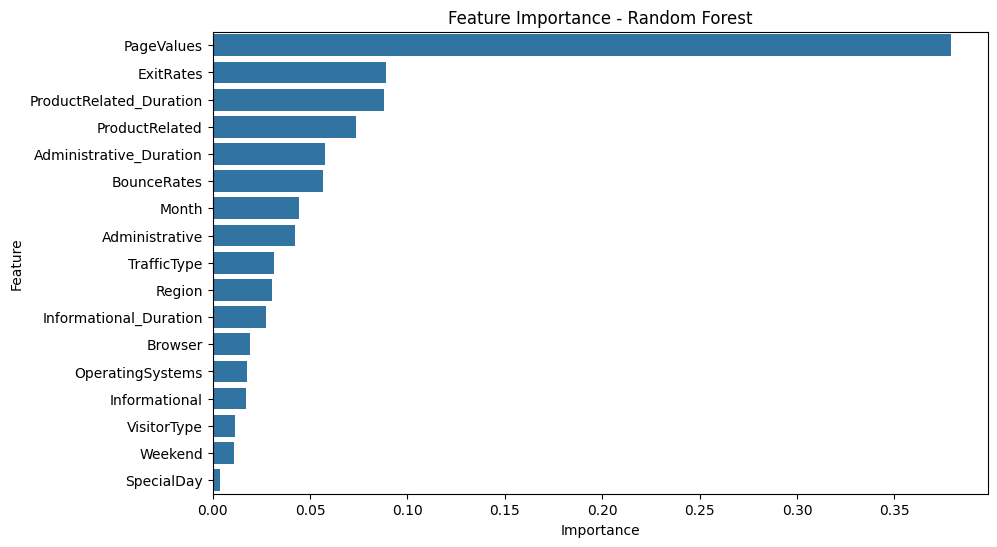

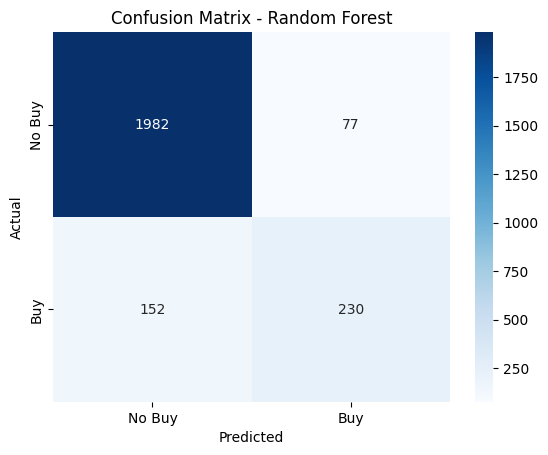

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load dataset
file_path = '/content/online_shoppers_intention_cleaned.csv'
df = pd.read_csv(file_path)

# Step 2: Define features and target
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue'].astype(int)  # Target variable

# Step 3: Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Method:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_report = classification_report(y_test, y_pred_log_reg)
print("\nLogistic Regression Performance:\n", log_reg_report)

# Random Forest Method:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Performance:\n", rf_report)

# Step 9: Accuracy Comparison
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"\nComparison of Model Performance:")
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

if rf_acc > log_reg_acc:
    print("Random Forest performed better.")
elif rf_acc < log_reg_acc:
    print("Logistic Regression performed better.")
else:
    print("Both models performed equally well.")

# Feature Importance Analysis
feature_importances = rf_clf.feature_importances_
feature_names = df.drop(columns=['Revenue']).columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Buy', 'Buy'], yticklabels=['No Buy', 'Buy'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Part 3 : Model Improvement and analysis**

 Logistic Regression achieved an accuracy of 88.69%, while Random Forest outperformed it with 90.62% accuracy. The superior performance of Random Forest suggests that customer purchase decisions are influenced by complex, non-linear relationships between variables.


**Prediction errors**  

The confusion matrix highlights both successes and areas needing refinement. The model correctly identified 230 users who went on to purchase a product and accurately classified 1,982 users who did not make a purchase. However, there were notable errors: 77 users were incorrectly flagged as likely buyers, and 152 users who actually purchased were misclassified as non-buyers. The false negatives represent a critical concern, as these are missed opportunities to engage potential customers.  


**What drives customers to buy?**  

 The most influential was PageValues, which measures user engagement with high-value pages such as checkout screens or product details. Users interacting with these pages were far more likely to convert, underscoring the importance of optimizing these touchpoints. Exit rates and bounce rates also played a significant role: users leaving the site quickly or abandoning their browsing session were less likely to purchase. This suggests that improving website navigation, reducing load times, or simplifying checkout processes could reduce friction and increase conversions. Additionally, time spent on product-related pages strongly correlated with purchase intent. Users who explored products in depth were more likely to buy, indicating that features like detailed descriptions, reviews, or interactive content might encourage deeper engagement.  

Secondary factors included administrative pages (e.g., account logins) and informational content (e.g., FAQs), which had a modest influence on purchase decisions. Seasonal trends, such as activity during specific months or around promotional events, also played a role, as did traffic sources. Returning visitors, for example, exhibited higher conversion rates than new users, highlighting the value of retention strategies.  

**Recommendation**

With Random Forest’s reliable predictions, businesses can take targeted steps to improve outcomes. For instance, teams can prioritize optimizing high-value pages like checkout screens or product detail pages to strengthen conversion pathways. Users exhibiting high exit or bounce rates could be flagged in real-time for interventions such as personalized discounts or live chat support to address hesitations. Marketing efforts can also be refined by targeting users based on their engagement patterns—for example, retargeting visitors who spend significant time on product pages but leave without purchasing.  


**Opportunities for refinement**  

Further improvements could focus on reducing the number of missed buyers. Adjusting the model’s decision threshold to prioritize sensitivity over specificity might help capture more true purchasers, even if it slightly increases false positives. A/B testing website layouts, particularly on pages with high exit rates or low engagement, could provide actionable insights into design changes that improve user experience. Additionally, integrating personalized recommendations based on browsing history could dynamically guide users toward products aligned with their interests, potentially boosting conversion rates.  


**Model Improvment and Hypertuning**


We used can use GridSearchCV , a powerful method for hyperparameter optimization. It systematically tests different combinations of hyperparameters to find the best-performing settings in order to improve the model.

We define a grid of potential values for four key hyperparameters:

**`n_estimators`** → Number of trees in the forest  
**Values tested:** `[100, 200, 300]`


**`max_depth`** → Maximum depth of each tree  
 **Values tested:** `[None, 10, 20]`

**min_samples_split`** → Minimum number of samples needed to split a node  
**Values tested:** `[2, 5, 10]`
Controls how deep trees can grow. Higher values

**`min_samples_leaf`** → Minimum number of samples in a leaf node  
**Values tested:** `[1, 2, 4]`


We perform a search over all possible combinations of the parameters.We split the training data into 5 parts, trains on 4, and tests on 1, repeating for all combinations.
After evaluating all combinations, it picks the best-performing model.

The tuned Random Forest is expected to reduce bias and variance, it has better feature utilization and it balances  performance and generalization.



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ---------------------- Hyperparameter Tuning Section ----------------------

# Separate features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------- Baseline Model ----------------------
# Train a baseline RandomForestClassifier with default parameters
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)

# Make predictions and evaluate the baseline model
y_pred_baseline = baseline_rf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy: {:.4f}".format(baseline_accuracy))
print("Baseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline))

# ---------------------- Grid Search for Hyperparameter Tuning ----------------------
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Output the best hyperparameters found
print("Best hyperparameters found: ", grid_search.best_params_)

# ---------------------- Tuned Model Evaluation ----------------------
# Retrieve the best estimator
tuned_rf = grid_search.best_estimator_

# Make predictions with the tuned model and evaluate its performance
y_pred_tuned = tuned_rf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy: {:.4f}".format(tuned_accuracy))
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# ---------------------- Model Comparison ----------------------
print("Comparison of Baseline and Tuned Models:")
print("Baseline Model Accuracy: {:.4f}".format(baseline_accuracy))
print("Tuned Model Accuracy: {:.4f}".format(tuned_accuracy))

if tuned_accuracy > baseline_accuracy:
    print("The tuned model performs better, suggesting it can more reliably predict whether the user will buy or not.")
else:
    print("The baseline model outperforms the tuned model. Consider revisiting the hyperparameter grid or model setup for further improvements.")

# ---------------------- Prediction Example ----------------------
sample = X_test.iloc[0:1]
predicted_class = tuned_rf.predict(sample)[0]
print(f"\nFor the given input sample, the model predicts that the user will {'buy' if predicted_class == 1 else 'not buy'}.")


Baseline Model Accuracy: 0.9041
Baseline Model Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2079
        True       0.74      0.54      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Model Accuracy: 0.9058
Tuned Model Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      2079
        True       0.76      0.54      0.63       362

    accuracy                           0.91      2441
   macro avg       0.84      0.75      0.79      2441
weighted avg       0.90      0.91      0.90      2441

Comparison of Baseline and Tuned M